<a href="https://colab.research.google.com/github/Ardhra36/Mini_Project/blob/main/Copy_of_Miniproject_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Miniproject-Fake Job Detection

In [ ]:
#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df=pd.read_csv("/content/fake_job_postings.csv",error_bad_lines=False ,engine="python")
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:
#Exploring dataset

In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(17880, 18)

In [ ]:
#Feature Selection
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
df = df[['title', 'location','company_profile', 'requirements', 'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function','salary_range',
       'fraudulent']]

In [ ]:
#checking for missing values and outliners

In [ ]:
df.isna().apply(pd.value_counts)

,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
False,17880.0,17534,14572,15185,17880.0,17880.0,17880.0,14409,10830,9775,12977,11425,2868,17880.0
True,NaN,346,3308,2695,NaN,NaN,NaN,3471,7050,8105,4903,6455,15012,NaN


In [ ]:
df.isnull().sum()

title                      0
location                 346
company_profile         3308
requirements            2695
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
salary_range           15012
fraudulent                 0
dtype: int64

In [ ]:
df.duplicated().sum()

493

In [ ]:
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.duplicated().sum()

0

In [ ]:
df_num = df[['telecommuting','has_company_logo','has_questions','fraudulent','salary_range']]
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]

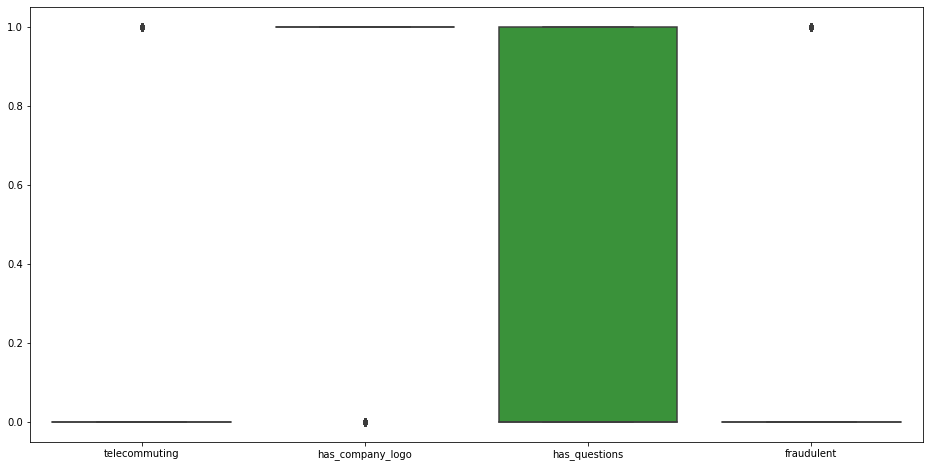

In [ ]:
plt.figure(figsize=[16,8])
sb.boxplot(data = df_num)
plt.show()

In [ ]:
#Removing outliners 

In [ ]:
df_num = df_num[df_num['telecommuting'] < 0.9 ]
df_num = df_num[df_num['fraudulent'] < 0.9 ]
df_num = df_num[df_num['has_company_logo'] > 0.1 ]
df_num

,telecommuting,has_company_logo,has_questions,fraudulent,salary_range
0,0,1,0,0,NaN
1,0,1,0,0,NaN
2,0,1,0,0,NaN
3,0,1,0,0,NaN
4,0,1,1,0,NaN
...,...,...,...,...,...
17872,0,1,0,0,NaN
17873,0,1,0,0,NaN
17875,0,1,1,0,NaN
17876,0,1,1,0,NaN


In [ ]:
df.isnull().sum()

title                      0
location                 340
company_profile         3255
requirements            2549
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3397
required_experience     6858
required_education      7889
industry                4769
function                6261
salary_range           14580
fraudulent                 0
dtype: int64

In [ ]:
df.dropna(axis= 0, how= 'any', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.isnull().sum()

title                  0
location               0
company_profile        0
requirements           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
salary_range           0
fraudulent             0
dtype: int64

In [ ]:
df.shape

(1485, 14)

In [ ]:
#Balancing dataset
df['fraudulent'].value_counts()

0    1403
1      82
Name: fraudulent, dtype: int64

In [ ]:
fraud = df[df['fraudulent']== 1]
fraud.shape

(82, 14)

In [ ]:
not_fraud = df[df['fraudulent']== 0]
not_fraud.shape

(1403, 14)

In [ ]:
fraud = fraud.sample(1403, replace=True)

In [ ]:
fraud.shape, not_fraud.shape

((1403, 14), (1403, 14))

In [ ]:
df = fraud.append(not_fraud)
df.reset_index()

,index,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
0,628,UST Testing Technician II,"US, CA, Bakersfield",Jaco Oil and Refined Resources have partnered ...,Job site set-up.Loading and unloading of equip...,0,1,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,65000-75000,1
1,845,Service Associate,"US, TX, AUSTIN",The Accion story began more than 100 years ag...,1 year applicable retail/customer service work...,0,1,1,Full-time,Entry level,High School or equivalent,Retail,Customer Service,25000-30000,1
2,845,Service Associate,"US, TX, AUSTIN",The Accion story began more than 100 years ag...,1 year applicable retail/customer service work...,0,1,1,Full-time,Entry level,High School or equivalent,Retail,Customer Service,25000-30000,1
3,7148,CUSTOMER SERVICE REP,"US, TX, DALLAS",Our globally connected world has forced busine...,RequirementsCommunication - communicates clear...,0,1,1,Full-time,Associate,High School or equivalent,Telecommunications,Customer Service,35000-45000,1
4,7183,CUSTOMER SERVICE AGENT,"US, TX, DALLAS",Aegis is a global business services provider i...,HIGH SCHOOL DIPLOMA,0,1,1,Full-time,Entry level,High School or equivalent,Consumer Services,Customer Service,30000-38000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,17439,Senior Trusts Manager,"GB, LND, Kingston upon Thames",VSO brings people together to fight poverty by...,The applicantVSO is looking for an individual ...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,International Trade and Development,Business Development,39000-41000,0
2802,17488,Management Accountant,"NZ, N, Auckland",PowerbyProxi and its customers are leading a r...,"Reporting to the CFO, the Management Accountan...",0,1,0,Contract,Mid-Senior level,Bachelor's Degree,Electrical/Electronic Manufacturing,Finance,100000-110000,0
2803,17515,Marketing manager,"GR, B, Thessaloniki",A vacation rental platform that will re-invent...,Perfect use of English and Greek language. Soc...,0,1,0,Part-time,Associate,Bachelor's Degree,"Leisure, Travel & Tourism",Marketing,5000-7000,0
2804,17849,Communication Designer,"US, CA, San Francisco",Balanced Labs exists to provide accountants an...,"Specifically, we’re looking for:5+ years of vi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,80000-100000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['requirements'] = le.fit_transform(df['requirements'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])
df['salary_range'] = le.fit_transform(df['salary_range'])

In [ ]:
df = df.reset_index()
df.head()

,index,title,location,company_profile,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_range,fraudulent
0,628,1138,229,194,582,0,1,1,1,5,2,63,23,432,1
1,845,1015,393,326,30,0,1,1,1,2,4,80,7,222,1
2,845,1015,393,326,30,0,1,1,1,2,4,80,7,222,1
3,7148,143,400,253,883,0,1,1,1,0,4,86,7,302,1
4,7183,141,400,31,519,0,1,1,1,2,4,20,7,262,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['index', 'title', 'location', 'company_profile', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'salary_range']].values
Y = df[['fraudulent']].values


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((2104, 14), (702, 14), (2104, 1), (702, 1))

In [ ]:
#classification algorithms
#knn algorithm
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
Y_pred=knn.predict(X_test)


In [ ]:
Y_test=Y_test.flatten()
Y_pred=Y_pred.flatten()


In [ ]:
df_knn=pd.DataFrame({'Y_test':Y_test,'Y_pred':Y_test})
df_knn

,Y_test,Y_pred
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
697,1,1
698,1,1
699,0,0
700,0,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_test)

0.9415954415954416